# Solving Growth Models

Contents:

- [Solving Growth Models](#Solving-Growth-Models)  
  - [A Basic Growth Model](#A-Basic-Growth-Model)  
  - [Transition Equations](#Transition-Equations)
  - [Steady State](#Steady-State)  
  - [Solving the Model](#Solving-the-Model)   
  - [Generating Optimal Paths](#Generating-Optimal-Paths)

This lab includes:

(1) An overview of a basic non-stochastic growth model;

(2) Finding the transition equations of a growth model using dynamic programming;

(3) Solving for the policy functions of a growth model using value function iteration;

(4) Generating the optimal paths of variables using policy functions.

## A Basic Growth Model

Consider the following economy.

There is a representative agent who has preferences given by 

\begin{align*}
    \sum_{t=0}^\infty \beta^t u(c_t) \, ,
\end{align*}

where $u(c_t) = \log(c_t)$ and $\beta \in (0,1)$ is the discount factor.

The technology in this economy is given by 

\begin{align*}
    c_t + i_t &= y_t \, , \\
    y_t &= A k_{t}^\alpha \, , \\
    k_{t+1} &= i_t + (1-\delta) k_t \, ,
\end{align*}

where $c_t$ is consumption, $i_t$ is investment, $y_t$ is output, $k_t$ is capital, $\alpha \in (0,1)$, $A \in \mathbb{R}_+$ is the productivity factor, and $\delta \in (0,1)$ is the depreciation rate.

The social planner's problem may be expressed by the following Bellman equation:

\begin{align*}
    V(k) = \max_{c,i,k'} \left\{ \log(c) + \beta V(k') \right\}
\end{align*}

subject to 

\begin{align}
    c + i &= A k^\alpha \, , \label{eq:flow_constraint} \\
    k' &= (1-\delta) k + i \, . \label{eq:capital_accumulation} 
\end{align}

## Transition Equations

We can simplify this system by using the first constraint to solve for $i$:

\begin{align*}
    i = A k^\alpha - c \, ,
\end{align*}

which can be substituted into the second constraint to yield 

\begin{align*}
    k' = (1-\delta) k + A k^\alpha - c  \, .
\end{align*}


The above equation for $k'$ can be substituted into the Bellman equation to yield 

\begin{align*}
    V(k) = \max_{c} \left\{ \log(c) + \beta V\left[ (1-\delta)k + Ak^\alpha - c \right] \right\} \, .
\end{align*}

Using the Bellman equation we may derive the following first-order condition for $c$:

\begin{align*}
    0 = \frac{1}{c} + \beta V'(k')(-1) \, ,
\end{align*}

which is equivalent to 

\begin{align}
\label{eq:foc}
    \beta V'(k') = \frac{1}{c} \, .
\end{align}

We may also use the Bellman eqation to obtain the following envelope condition:

\begin{align*}
V'(k) = \beta V'(k') (1 - \delta + \alpha A k^{\alpha - 1} ) \, .
\end{align*}

Eq. \eqref{eq:foc} can then be substituted into the RHS of the envelope condition to yield 

\begin{align*}
    V'(k) = \frac{1}{c} \left( 1 - \delta + \alpha A k^{\alpha-1} \right) \, .
\end{align*}

This equation can now be "stepped-up" by a period ($k'$ and $c'$ instead of $k$ and $c$) to give us

\begin{align*}
    V'(k') = \frac{1}{c'} \left( 1 - \delta + \alpha A k'^{\alpha-1} \right) \, .
\end{align*}

We once again substitute Eq. \eqref{eq:foc} into the LHS of the above equation to obtain 

\begin{align*}
    \frac{1}{\beta c} = \frac{1}{c'} \left( 1 - \delta + \alpha A k'^{\alpha-1} \right) \, ,
\end{align*}

which can be used to solve for $c'$:

\begin{align*}
    c' = c \beta \left( 1 - \delta + \alpha A k'^{\alpha - 1} \right) \, .
\end{align*}

We can now attach time indices to the above equation to obtain the Euler equation:

\begin{align}
\label{eq:euler}
    c_{t+1} = c_t \beta \left(1 - \delta + \alpha A k_{t+1}^{\alpha-1} \right) \, .
\end{align}

Therefore, the economy is governed by the system of transition equations made up by Eqs. \eqref{eq:flow_constraint}, \eqref{eq:capital_accumulation}, and \eqref{eq:euler}.

I repeat all equations below for easy reference.

**Capital accumulation:** 

\begin{align*}
k_{t+1} = (1-\delta) k_t + Ak_t^{\alpha} - c_t
\end{align*}

**Euler equation:** 

\begin{align*}
c_{t+1} = c_t \beta \left( 1 - \delta + \alpha A k_{t+1}^{\alpha-1} \right)
\end{align*}

**Output:**

\begin{align*}
y_t = A k_t^\alpha 
\end{align*}


**Flow budget constraint / Investment:** 

\begin{align*}
i_t = A k_t^{\alpha} - c_t
\end{align*}

## Steady State

In the steady state (SS), we have $c_{t+1} = c_t = \overline{c}$ and $k_{t+1} = k_t = \overline{k}$, which also implies SS output 

\begin{align*}
\overline{y} = A \overline{k}^\alpha
\end{align*}

and SS investment 

\begin{align*}
\overline{i} = \overline{y} - \overline{c} \, .
\end{align*}

We now need to solve for $\overline{c}$ and $\overline{k}$.

Applying a bit of algebra to the Euler and capital accumulation equations yields 

\begin{align*}
        \overline{k} = \left( \frac{\alpha A}{\beta^{-1} - 1 + \delta} \right)^\frac{1}{1-\alpha} \, ,
\end{align*}

along with 

\begin{align*}
    \overline{c} = A \overline{k}^\alpha - \delta \overline{k} \, .
\end{align*}

Let's write a function named `steadyState` that will output all model parameters and steady state values:

In [2]:
"""
   steadyState(α, β, δ, A)

Solves for the steady state of the growth model.

# Arguments
* `α` -- production function parameter
* `β` -- discount factor 
* `δ` -- depreciation rate 
* `A` -- productivity factor

"""
function steadyState(α = 0.3, β = 0.98, δ = 0.02, A = 1)
    
    # Solve for k̄
    k̄ = (  (α * A) / (β^(-1) - 1 + δ) )^(1/(1-α))
    
    # Solve for ȳ
    ȳ = A * k̄^α
    
    # Solve for c̄
    c̄ = ȳ - δ * k̄
    
    # Solve for ī
    ī = ȳ - c̄
    
    # Return model parameters and steady state variables
    return (α = α, β = β, δ = δ, A = A, c̄ = c̄, k̄ = k̄, ȳ = ȳ, ī = ī)
end

steadyState

We run the function and store all outputs:

In [3]:
# Generate and save steady state objects
α, β, δ, A, c̄, k̄, ȳ, ī = steadyState()

# Print steady state values
@show c̄
@show k̄
@show ȳ
@show ī;

c̄ = 2.0106154404398704
k̄ = 17.53027697180669
ȳ = 2.361220979876004
ī = 0.3506055394361338


## Solving the Model

Let's load the packages we might need.

In [4]:
# Load all packages we might need
using LinearAlgebra, Plots, LaTeXStrings

Our goal now is to computationally solve for the policy function using value function iteration.

We start by constructing a function named `growthBellmanMap` that applies a single iteration of the Bellman map.

In [5]:
"""
   growthBellmanMap(V, kgrid, α, β, δ, A)

Applies a single iteration of the Bellman map to the model.
Returns a new iteration of the value and policy functions.

# Arguments
* `V`     -- An initial value function
* `kgrid` -- A grid of k values over some interval
* `α`     -- production function parameter
* `β`     -- discount factor 
* `δ`     -- depreciation rate 
* `A`     -- productivity factor

"""
function growthBellmanMap(V, kgrid, α, β, δ, A)
    
    N     = length(kgrid) #k grid length
    V_out = zeros(N) #new value function
    n_pol = zeros(Int,N) #policy rule for grid points
    k_pol = zeros(N) #policy rule for capital
    c_pol = zeros(N) #consumption rule
    obj   = zeros(N) #objective to be maximized wrt k′
    
    for n in 1:N #iterate for each initial capital
        
        for nprime in 1:N #iterate for choice of capital this period
            
            # Compute optimal consumption level
            c = (1-δ) * kgrid[n] + A * kgrid[n]^(α) - kgrid[nprime]
            
            if c <= 0
                obj[nprime] = -Inf #penalty if consumption <0
            else
                obj[nprime] = log(c) + β * V[nprime] #otherwise RHS of bellman equation
            end
        end
        
        V_out[n], n_pol[n] = findmax(obj) #find optimal value and the choice that gives it
        k_pol[n]           = kgrid[n_pol[n]] #record capital policy
        c_pol[n]           =(1-δ) * kgrid[n] + A * kgrid[n]^(α) - k_pol[n] #record consumption policy
            
    end
    
    return V_out, n_pol, k_pol, c_pol
end

growthBellmanMap

Then we create a function named `solveGrowthBellman` that iteratively applies `growthBellmanMap` until reaching convergence.

The output of the function will contain a vector representing the value function, the policy functions for $k$ and $c$, as well as an index representing the policy map from $k_t$ to $k_{t+1}$ on a given grid for $k$.

In [6]:
"""
   solveGrowthBellman(V0, kgrid, α, β, δ, A, ϵ)

Applies the Bellman map until convergence.
Returns final iterations of the value and policy functions.

# Arguments
* `V`     -- initial value function
* `kgrid` -- grid of k values over some interval
* `α`     -- production function parameter
* `β`     -- discount factor 
* `δ`     -- depreciation rate 
* `A`     -- productivity factor
* `ϵ`     -- convergence condition

"""
function solveGrowthBellman(V0, kgrid, α, β, δ, A, ϵ=1e-6)
    
    # Initialize the convergence metric
    diff = 0.1
    
    # Apply the first iteration of the Bellman map
    V, n_pol, k_pol, c_pol = growthBellmanMap(V0, kgrid, α, β, δ, A)
    
    # Apply the Bellman map until convergence
    while diff > ϵ
        
        V_new, n_pol, k_pol, c_pol  = growthBellmanMap(V, kgrid, α, β, δ, A)
        
        diff = norm(V_new-V,Inf) #update convergence metric
        
        V = V_new #update value function
    end
    
    # Return final value function, policy function map indexes, 
    # and policy functions for k and c
    return V, n_pol, k_pol, c_pol
end

solveGrowthBellman

We now have everything we need to solve the model using value function iteration:

In [7]:
# Create a grid for k
N     = 501
kgrid = LinRange(k̄-10,k̄+10,N) #center grid on k̄

# Generate value function iteration solutions
V, n_pol, k_pol, c_pol = solveGrowthBellman(zeros(N), kgrid, α, β, δ, A);

We can plot the policy function for $k$:

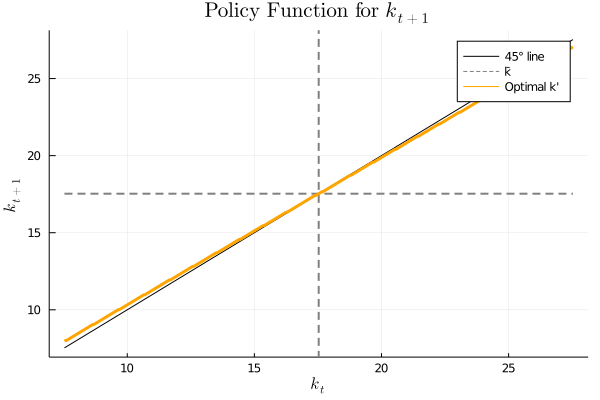

In [8]:
plot(kgrid, kgrid, label = "45° line", color = "black")
plot!(kgrid, fill(k̄, length(kgrid)), label = "k̄", color = "gray", lw = 2, linestyle = :dash)
vline!([k̄], label = "", color = "gray",lw = 2, linestyle = :dash)
plot!(kgrid, k_pol, label = "Optimal k'", color = "orange", lw = 3)
title!("\$ \\textrm{Policy Function for } k_{t+1} \$")
xlabel!("\$k_{t}\$")
ylabel!("\$k_{t+1}\$")

We may also plot the policy function for $c$:

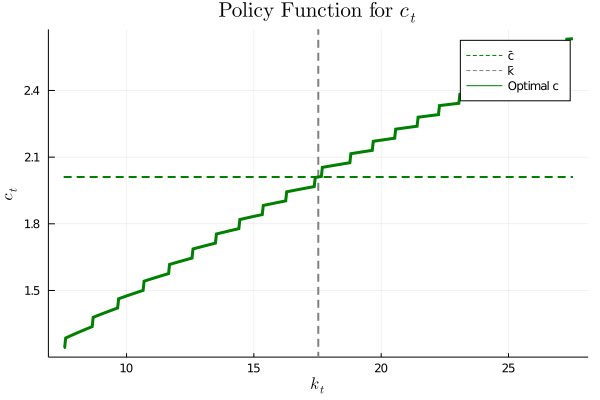

In [9]:
plot(title = "\$ \\textrm{Policy Function for } c_t \$")
plot!(kgrid, fill(c̄, length(kgrid)), label = "c̄", color = "green", lw = 2, linestyle = :dash)
vline!([k̄], label = "k̄", color = "gray", lw = 2,  linestyle = :dash)
plot!(kgrid, c_pol, label = "Optimal c", color = "green", lw = 3)
xlabel!("\$k_t\$")
ylabel!("\$c_t\$")

## Generating Optimal Paths

Let's create a function that generates the path of the economy over $T$ time periods given the relevant policy functions and $k_0$ .

In [10]:
"""
   growthBellmanPath(kgrid, n_pol, k_pol, c_pol, grid_initial, T)

Applies the Bellman map until convergence.
Returns final iterations of the value and policy functions.

# Arguments
* `kgrid`        -- grid of k values over some interval
* `n_pol`        -- capital policy grid index map
* `k_pol`        -- capital policy function
* `c_pol`        -- consumption policy function
* `grid_initial` -- initial index of k
* `T`            -- length of time interval

"""
function growthBellmanPath(kgrid, n_pol, k_pol, c_pol, grid_initial::Int64, T::Int64)

    index = fill(0,T+1) # capital grid index path
    c = zeros(T)        # empty vector to store consumption path
    k = zeros(T+1)      # empty vector to store capital path
    
    index[1] = grid_initial # store t=0 capital index
    
    k[1] = kgrid[index[1]] # store capital at t=0
    
    for t in 1:T
        c[t] = c_pol[index[t]] # store consumption at t
        k[t+1] = k_pol[index[t]] # store capital t+1
        index[t+1] = n_pol[index[t]] # store t+1 capital index
    end 
    
    k = k[1:T]             # cut the last entry of k path 
    grid_pts = index[1:T]  # cut the last entry of capital index path
    
    # Return capital, consumption, and capital index paths
    return k, c, grid_pts
end

growthBellmanPath

First we plot the paths of $k$ and $c$ given the lowest possible $k_0$ from our grid.

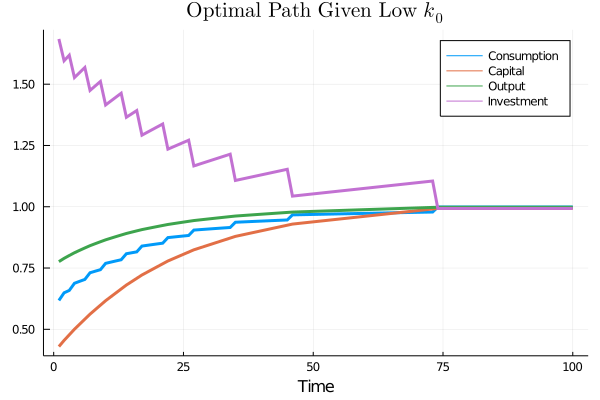

In [15]:
T = 100
k_path, c_path, grid_path = growthBellmanPath(kgrid, n_pol, k_pol, c_pol, 1, T)
time = 1:T
plot(time, c_path./c̄, label = "Consumption", lw=3)
plot!(time, k_path./k̄, label = "Capital", lw =3, title = "\$ \\textrm{Optimal Path Given Low } k_0 \$")
plot!(time, (A.*k_path.^α)./ȳ, label = "Output", lw=3)
plot!(time, (A.*k_path.^α - c_path)/ī, label = "Investment", lw=3)
xlabel!("Time")

Notice that a low initial capital implies a low initial consumption level.

Over time, both variable seem to grow uniformly and ultimately convergence to their respective steady states.

Next, we plot the paths of $k$ and $c$ once again, but this time given the highest possible value for $k_0$ from our grid.

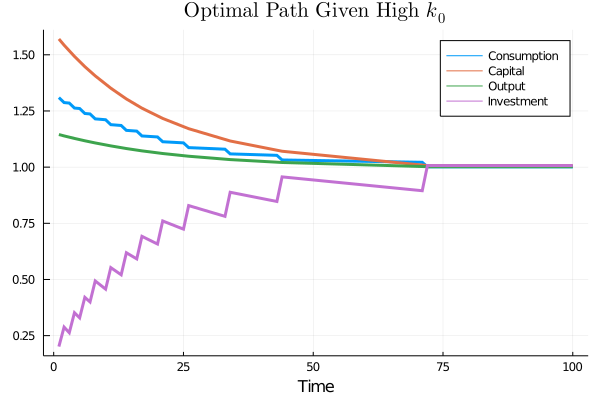

In [13]:
T = 100
k_path, c_path, grid_path = growthBellmanPath(kgrid, n_pol, k_pol, c_pol, length(kgrid), T)
time = 1:T
plot(time, c_path./c̄, label = "Consumption", lw = 3)
plot!(time, k_path./k̄, label = "Capital", lw = 3, title = "\$ \\textrm{Optimal Path Given High } k_0 \$")
plot!(time, (A.*k_path.^α)./ȳ, label = "Output", lw=3)
plot!(time, (A.*k_path.^α - c_path)/ī, label = "Investment", lw=3)
xlabel!("Time")

Notice that a high initial capital implies a high initial consumption level.

Over time, both variable seem to experience uniform negative growth until they convergence to their respective steady states.